In [49]:
import numpy as np
import matplotlib.pyplot as plt
import juanfit
from astropy.io import fits
from astropy.nddata import CCDData
from astropy.visualization import ImageNormalize, SqrtStretch, LogStretch, ZScaleInterval
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord, SpectralCoord
import astropy.units as u
from sunpy.coordinates.frames import Helioprojective
from ccdproc import ImageFileCollection
from glob import glob
import os
import cmcrameri.cm as cmcm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoLocator, AutoMinorLocator, FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter
import dkist
from reproject.mosaicking import find_optimal_celestial_wcs

In [2]:
asdf_file = "../src/DKIST/pid_1_118/BJLKB/VBI_L1_20220602T172155_BJLKB.asdf"

In [3]:
ds = dkist.Dataset.from_asdf(asdf_file)

/home/yjzhu/anaconda3/lib/python3.8/site-packages/asdf/asdf.py:358: AsdfWarning: File 'file:///home/yjzhu/SOLAR/DKIST_PSP_202206/src/DKIST/pid_1_118/BJLKB/VBI_L1_20220602T172155_BJLKB.asdf' was created with extension class 'asdf.extension.BuiltinExtension' (from package asdf==2.14.3), but older package (asdf==2.10.0) is installed.
  warnings.warn(msg, AsdfWarning)


In [47]:
ds

In [4]:
ds[0,1][0,:,:].wcs

SlicedLowLevelWCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): (4096, 4096)

Pixel Dim  Axis Name                  Data size  Bounds
        0  helioprojective latitude        4096  None
        1  helioprojective longitude       4096  None

World Dim  Axis Name                  Physical Type                   Units
        0  helioprojective latitude   custom:pos.helioprojective.lon  arcsec
        1  helioprojective longitude  custom:pos.helioprojective.lat  arcsec

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes

In [5]:
def plot_colorbar(im, ax, width="3%", height="100%",loc="lower left",fontsize=14):
    clb_ax = inset_axes(ax,width=width,height=height,loc=loc,
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
    clb_ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax.yaxis.get_offset_text().set_fontsize(fontsize)
    clb_ax.tick_params(labelsize=fontsize)
    return clb, clb_ax

In [55]:
wcs_list = []
for ii in range(3):
    for jj in range(3):
        wcs_list.append((ds[ii,jj][0,:,:].data.shape, ds[ii,jj][0,:,:].wcs))

In [54]:
ds[ii,jj][0,:,:].data.shape

(4096, 4096)

In [56]:
wcs_out, shape_out = find_optimal_celestial_wcs(wcs_list, frame=Helioprojective)

AttributeError: 'HighLevelWCSWrapper' object has no attribute 'naxis'

In [7]:
ds[0,0][0,:,:].axis_world_coords()[0].Tx.value

array([[-597.77889061, -597.78952672, -597.80016283, ..., -641.31249787,
        -641.32313398, -641.33377009],
       [-597.77878057, -597.78941668, -597.80005279, ..., -641.31238783,
        -641.32302394, -641.33366005],
       [-597.77867053, -597.78930664, -597.79994275, ..., -641.31227779,
        -641.32291391, -641.33355002],
       ...,
       [-597.32849741, -597.33913352, -597.34976964, ..., -640.86212317,
        -640.87275929, -640.8833954 ],
       [-597.32838737, -597.33902348, -597.3496596 , ..., -640.86201313,
        -640.87264925, -640.88328537],
       [-597.32827733, -597.33891344, -597.34954956, ..., -640.8619031 ,
        -640.87253922, -640.88317533]])

In [29]:
ds[0,0].headers[0]["DATE-AVG"]

'2022-06-02T17:21:55.345504'

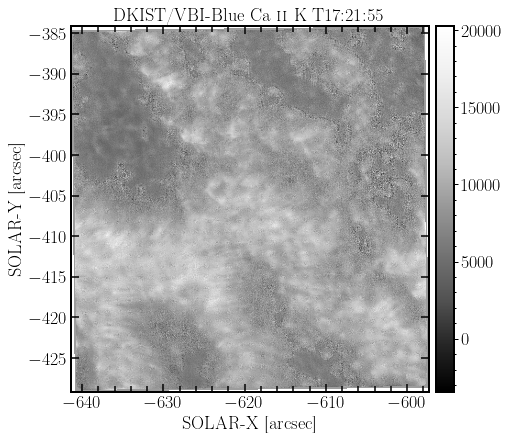

In [36]:
fig,ax = plt.subplots(figsize=(8,6),constrained_layout=True)

for ii in range(1):
    for jj in range(1):
        ds_slice = ds[ii,jj][0,:,:]

        xmesh = ds_slice.axis_world_coords()[0].Tx.value
        ymesh = ds_slice.axis_world_coords()[0].Ty.value

        im = ax.pcolormesh(xmesh,ymesh,ds_slice.data,shading="auto",rasterized=True,cmap="Greys_r")

ax.set_aspect("equal")

       
ax.tick_params(labelsize=18,direction="in",which="both",top=True,right=True)
ax.tick_params(which="major",length=8,width=1.5)
ax.tick_params(which="minor",length=6,width=1.5)
plot_colorbar(im, ax, width="5%",fontsize=18)
ax.set_xlabel(r"SOLAR-X [arcsec]",fontsize=18)
ax.set_ylabel(r"SOLAR-Y [arcsec]",fontsize=18)
ax.set_title(r"DKIST/VBI-Blue Ca \textsc{ii} K "+ds[0,0].headers[0]["DATE-AVG"][10:19],fontsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator())
# ax.yaxis.set_minor_locator(AutoMinorLocator())

Text(0.5, 1.0, 'DKIST/VBI-Blue Ca \\textsc{ii} K T17:21:55')

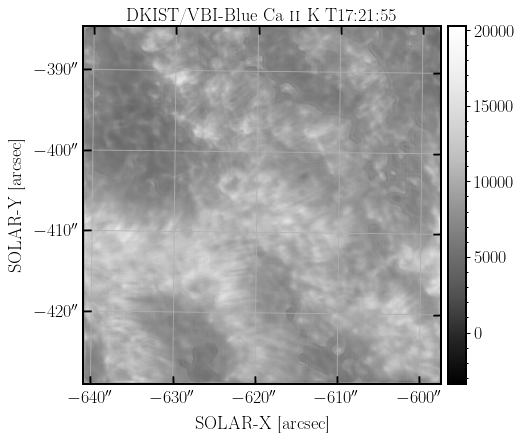

In [35]:
fig = plt.figure(figsize=(8,6),constrained_layout=True)
ax = fig.add_subplot(projection=ds[0,0][0,:,:].wcs)
im = ax.imshow(ds[0,0][0,:,:].data,origin="lower",cmap="Greys_r")
ax.invert_xaxis()
ax.invert_yaxis()
ax.grid("on")

ax.tick_params(labelsize=18,direction="in",which="both")
ax.tick_params(which="major",length=8,width=1.5)
plot_colorbar(im, ax, width="5%",fontsize=18)
ax.set_xlabel(r"SOLAR-X [arcsec]",fontsize=18)
ax.set_ylabel(r"SOLAR-Y [arcsec]",fontsize=18)
ax.set_title(r"DKIST/VBI-Blue Ca \textsc{ii} K "+ds[0,0].headers[0]["DATE-AVG"][10:19],fontsize=18)

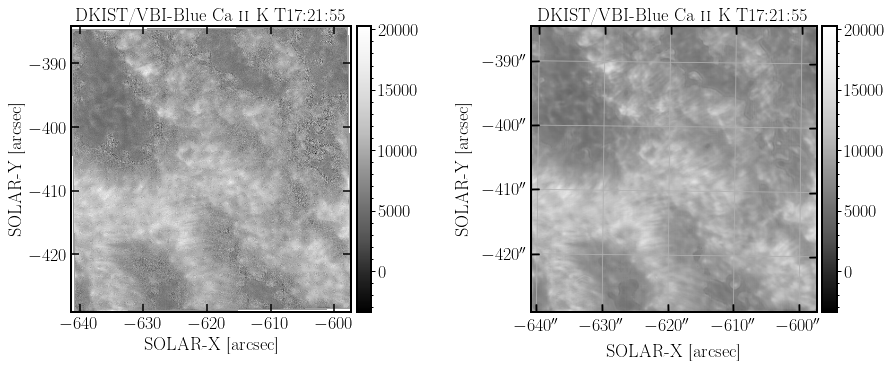

In [42]:
fig = plt.figure(figsize=(12,5),constrained_layout=True)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2,projection=ds[0,0][0,:,:].wcs)

ds_slice = ds[0,0][0,:,:]

xmesh = ds_slice.axis_world_coords()[0].Tx.value
ymesh = ds_slice.axis_world_coords()[0].Ty.value

im1 = ax1.pcolormesh(xmesh,ymesh,ds_slice.data,shading="auto",rasterized=True,cmap="Greys_r")
plot_colorbar(im1, ax1, width="5%",fontsize=18)
ax1.set_aspect("equal")

im2 = ax2.imshow(ds[0,0][0,:,:].data,origin="lower",cmap="Greys_r")
ax2.invert_xaxis()
ax2.invert_yaxis()
ax2.grid("on")
plot_colorbar(im2, ax2, width="5%",fontsize=18)


for ax_ in (ax1,ax2):
    ax_.tick_params(labelsize=18,direction="in",which="both")
    ax_.tick_params(which="major",length=8,width=1.5)

    ax_.set_xlabel(r"SOLAR-X [arcsec]",fontsize=18)
    ax_.set_ylabel(r"SOLAR-Y [arcsec]",fontsize=18)
    ax_.set_title(r"DKIST/VBI-Blue Ca \textsc{ii} K "+ds[0,0].headers[0]["DATE-AVG"][10:19],fontsize=18)
# ax.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(top=True,right=True)
